In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

In [2]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/daily_spendings - lastversion.xlsx"
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Example Of Our Data Set

---




In [3]:
print(df.columns.tolist())
df.dtypes


['Date', 'Total Screen Time of Phone(mins)', 'Time on Shopping Apps (mins)', 'Time on Social Media (mins)', 'Money Spent (TL)', 'Purchase Type', 'Time of Purchase', 'Ad Exposure Before Purchase (Yes/No)']


,0
Date,datetime64[ns]
Total Screen Time of Phone(mins),int64
Time on Shopping Apps (mins),int64
Time on Social Media (mins),int64
Money Spent (TL),float64
Purchase Type,object
Time of Purchase,object
Ad Exposure Before Purchase (Yes/No),object


In [4]:
# Preprocess columns
df['Date'] = pd.to_datetime(df['Date'])
df['Money Spent (TL)'] = df['Money Spent (TL)'].astype(float)
df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({'yes': 1, 'no': 0})


In [5]:
df.head()

,Date,Total Screen Time of Phone(mins),Time on Shopping Apps (mins),Time on Social Media (mins),Money Spent (TL),Purchase Type,Time of Purchase,Ad Exposure Before Purchase (Yes/No)
0,2025-03-31,167,16,142,455.80,Shopping,evening,1
1,2025-03-31,167,16,142,247.00,Food,afternoon,0
2,2025-03-01,315,32,232,2785.00,Shopping,evening,1
3,2025-03-03,191,28,167,193.90,Beverage,morning,0
4,2025-03-04,199,27,154,257.99,Shopping,night,1


# **Graphs Of Data and Statistics**


---



In [6]:
 #example of data set
df.describe()


,Date,Total Screen Time of Phone(mins),Time on Shopping Apps (mins),Time on Social Media (mins),Money Spent (TL),Ad Exposure Before Purchase (Yes/No)
count,101,101.000000,101.000000,101.000000,101.000000,101.000000
mean,2025-04-28 18:17:49.306930688,242.792079,34.099010,165.990099,525.822772,0.415842
min,2025-03-01 00:00:00,121.000000,8.000000,56.000000,80.000000,0.000000
25%,2025-04-14 00:00:00,196.000000,25.000000,139.000000,216.800000,0.000000
50%,2025-05-07 00:00:00,243.000000,30.000000,173.000000,300.000000,0.000000
75%,2025-05-16 00:00:00,293.000000,44.000000,198.000000,538.990000,1.000000
max,2025-05-27 00:00:00,365.000000,76.000000,265.000000,2866.800000,1.000000
std,NaN,60.851839,15.824351,53.478499,587.126566,0.495325


<Axes: title={'center': 'Money Spent (TL)'}>

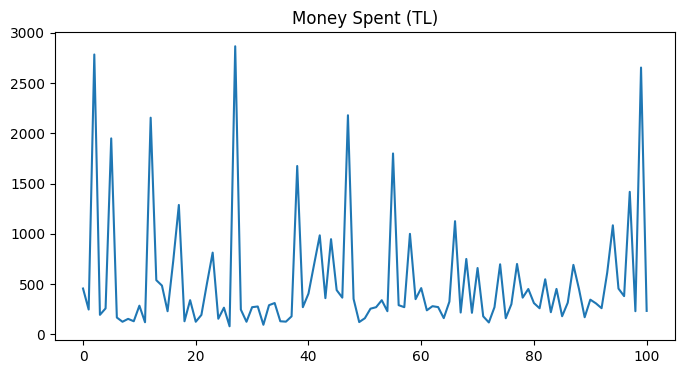

In [7]:
#  Money Spent (TL)

from matplotlib import pyplot as plt
df['Money Spent (TL)'].plot(kind='line', figsize=(8, 4), title='Money Spent (TL)') #y axis amount of money

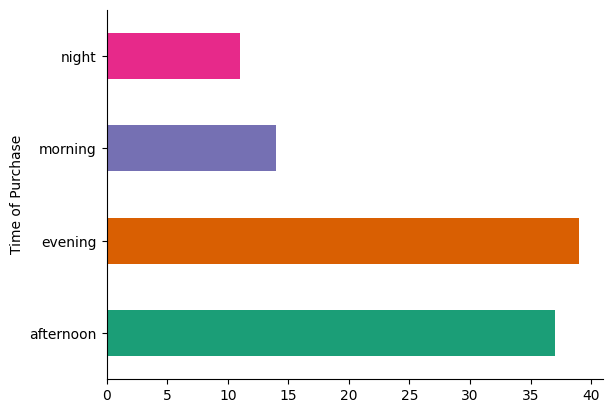

In [8]:
#Bar chart of different times of purchase

df.groupby('Time of Purchase').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

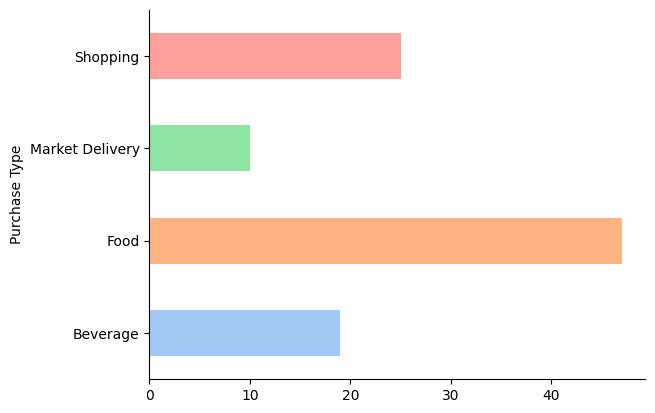

In [9]:
# Purchase Type vs frequency


df.groupby('Purchase Type').size().plot(kind='barh', color=sns.color_palette('pastel'))
plt.gca().spines[['top', 'right',]].set_visible(False)

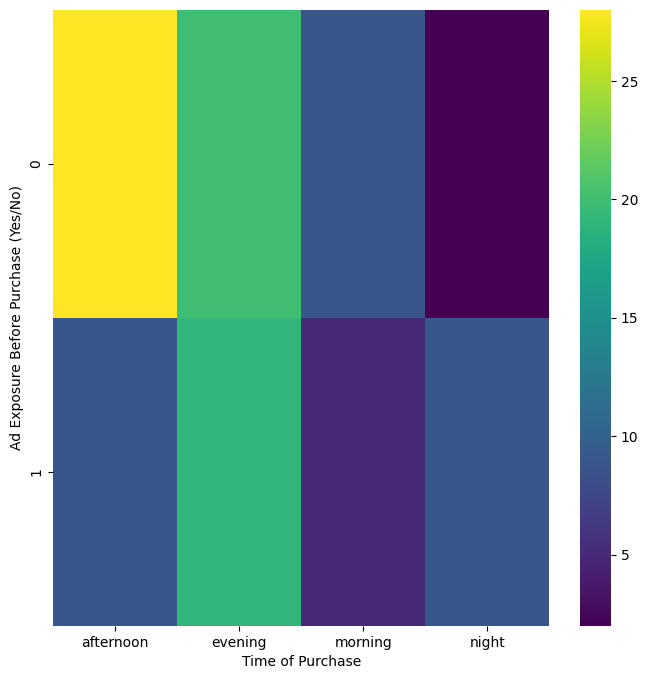

In [10]:
#Time of Purchase vs Ad Exposure Before Purchase (Yes/No)
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ad Exposure Before Purchase (Yes/No)'].value_counts()
    for x_label, grp in df.groupby('Time of Purchase')})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time of Purchase')
_ = plt.ylabel('Ad Exposure Before Purchase (Yes/No)')

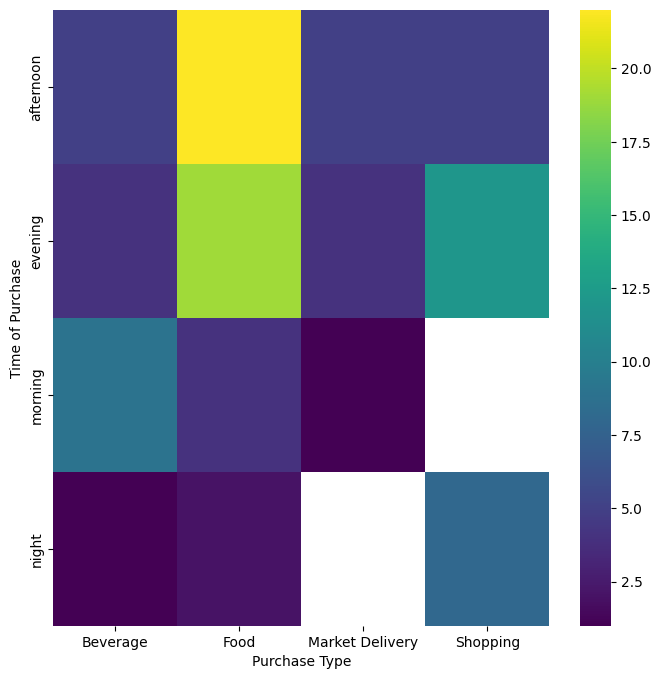

In [11]:
# Purchase Type vs Time of Purchase


plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Time of Purchase'].value_counts()
    for x_label, grp in df.groupby('Purchase Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Purchase Type')
_ = plt.ylabel('Time of Purchase')

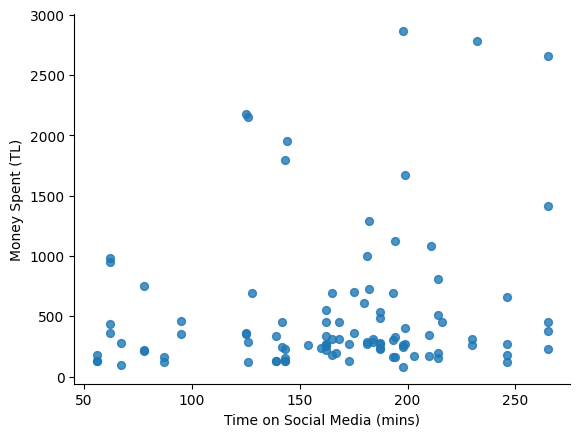

In [12]:
# Time on Social Media (mins) vs Money Spent (TL)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Time on Social Media (mins)', y='Money Spent (TL)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

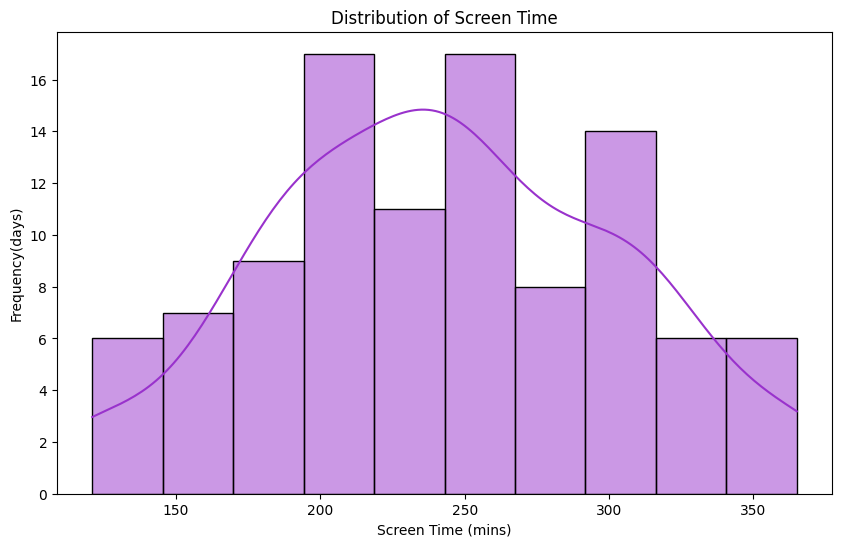

In [13]:

# Histogram: Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Screen Time of Phone(mins)'], kde=True, bins=10,color="darkorchid")
plt.title("Distribution of Screen Time")
plt.xlabel("Screen Time (mins)")
plt.ylabel("Frequency(days)")  #days
plt.show()

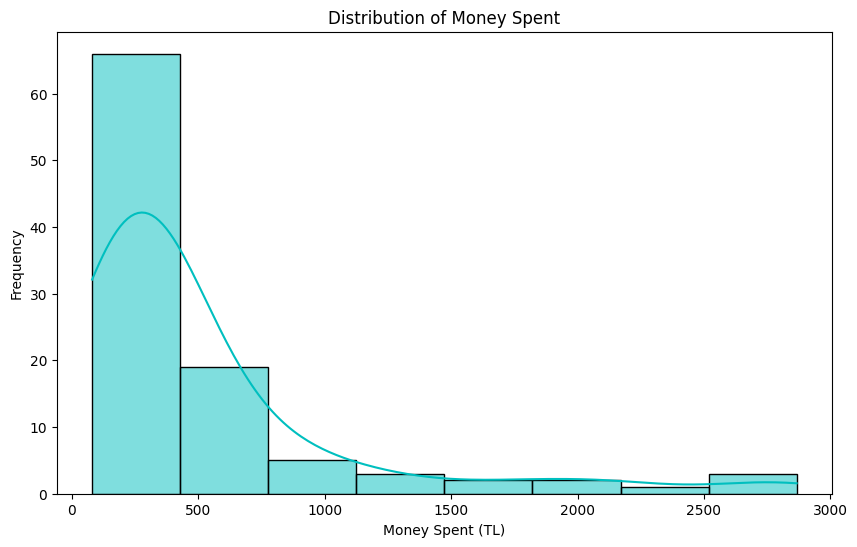

In [14]:
# Histogram: Money Spent
plt.figure(figsize=(10, 6))
sns.histplot(df['Money Spent (TL)'],kde=True, bins=8,color="c")
plt.title("Distribution of Money Spent")
plt.xlabel("Money Spent (TL)")
plt.ylabel("Frequency")
plt.show()

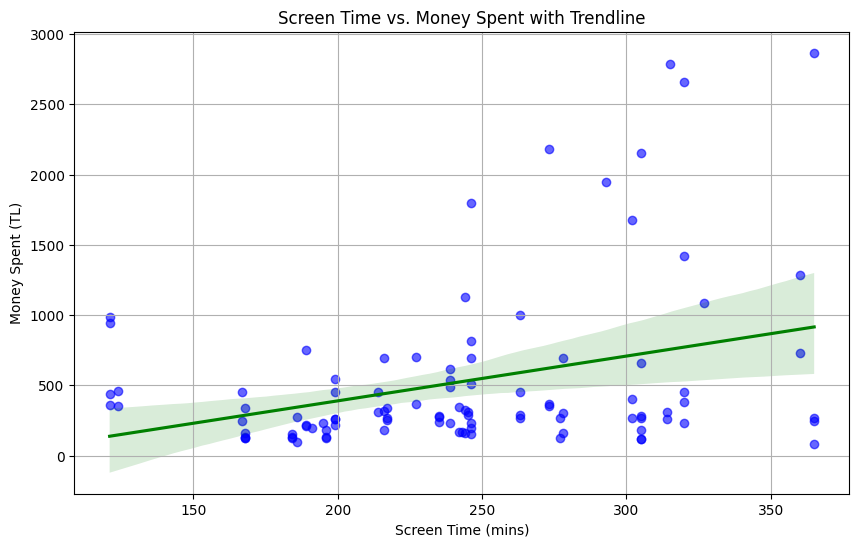

In [15]:
# Scatterplot: Screen Time vs Spending with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Screen Time of Phone(mins)', y='Money Spent (TL)', data=df, color='blue', scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title("Screen Time vs. Money Spent with Trendline")
plt.xlabel("Screen Time (mins)")
plt.ylabel("Money Spent (TL)")
plt.grid(True)
plt.show()

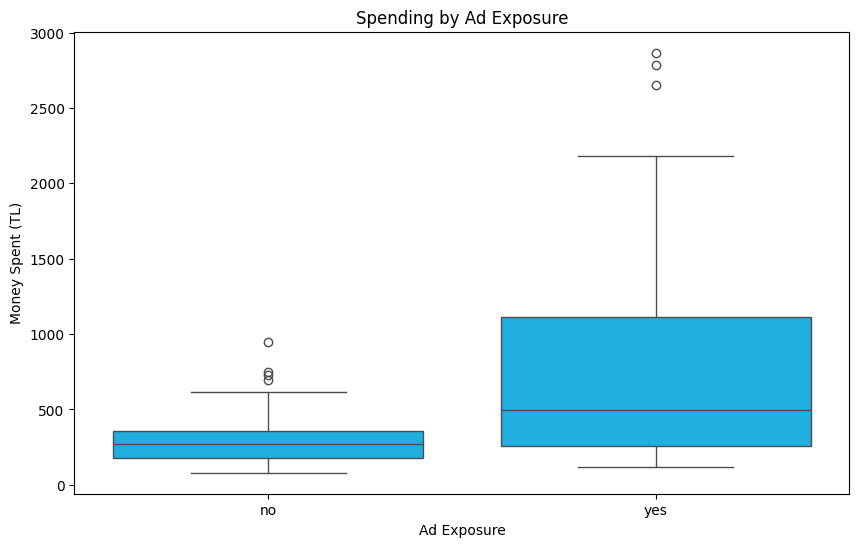

In [16]:
# Boxplot: Ad exposure vs Spending
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ad Exposure Before Purchase (Yes/No)', y='Money Spent (TL)', data=df ,color='deepskyblue') # Changed x to the original column name
plt.title("Spending by Ad Exposure")
plt.xlabel("Ad Exposure")
plt.ylabel("Money Spent (TL)")
plt.xticks([0, 1], ['no', 'yes'])
plt.show()

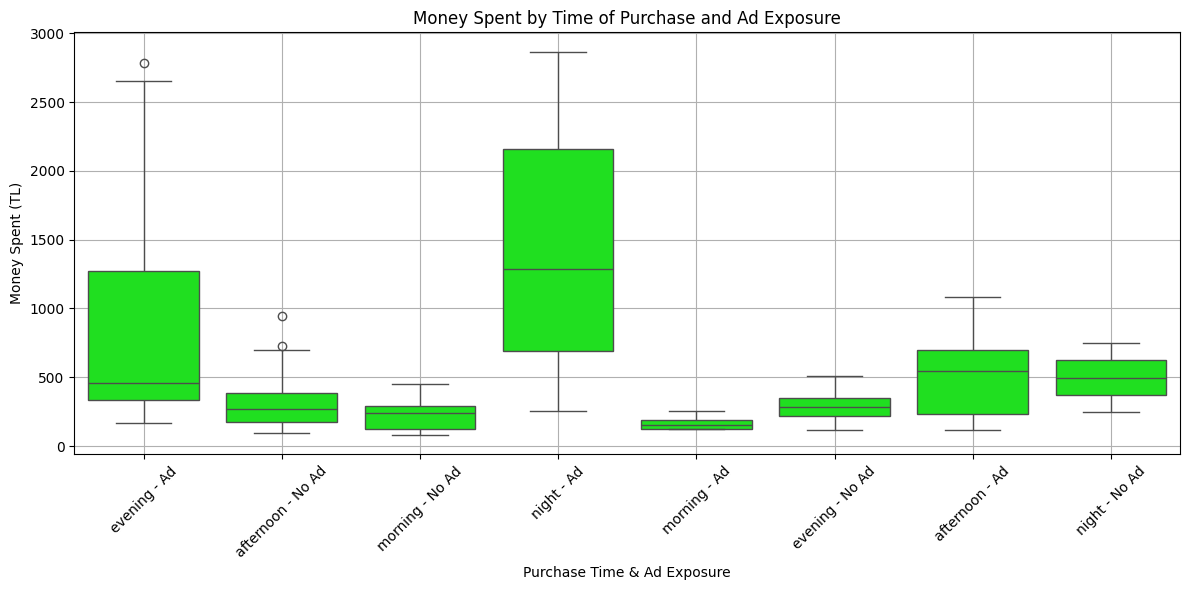

In [17]:
# Create dummy variables for Time of Purchase
time_of_purchase_dummies = pd.get_dummies(df['Time of Purchase'], prefix='Time of Purchase')

# Concatenate dummy variables with original DataFrame
df = pd.concat([df, time_of_purchase_dummies], axis=1)




df['Time of Purchase'] = df[['Time of Purchase_afternoon', 'Time of Purchase_evening', 'Time of Purchase_morning', 'Time of Purchase_night']].idxmax(axis=1)
df['Time of Purchase'] = df['Time of Purchase'].str.replace('Time of Purchase_', '') # Clean up the column name

df['Time of Purchase'] = df['Time of Purchase'].str.strip()
df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({1: 'Ad', 0: 'No Ad'})

# new column that combines both
df['Purchase Context'] = df['Time of Purchase'] + " - " + df['Ad Exposure Before Purchase (Yes/No)']


# value counts for each category in 'Purchase Context'
counts = df['Purchase Context'].value_counts()
# Filter out categories with less than a minimum number of data points (e.g., 2)
filtered_df = df[df['Purchase Context'].isin(counts[counts >= 2].index)]


# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Purchase Context', y='Money Spent (TL)', data=filtered_df,color='lime') # Fixed: pallette to palette
plt.title("Money Spent by Time of Purchase and Ad Exposure")
plt.xticks(rotation=45)
plt.ylabel("Money Spent (TL)")
plt.xlabel("Purchase Time & Ad Exposure")
plt.grid(True)
plt.tight_layout()
plt.show()


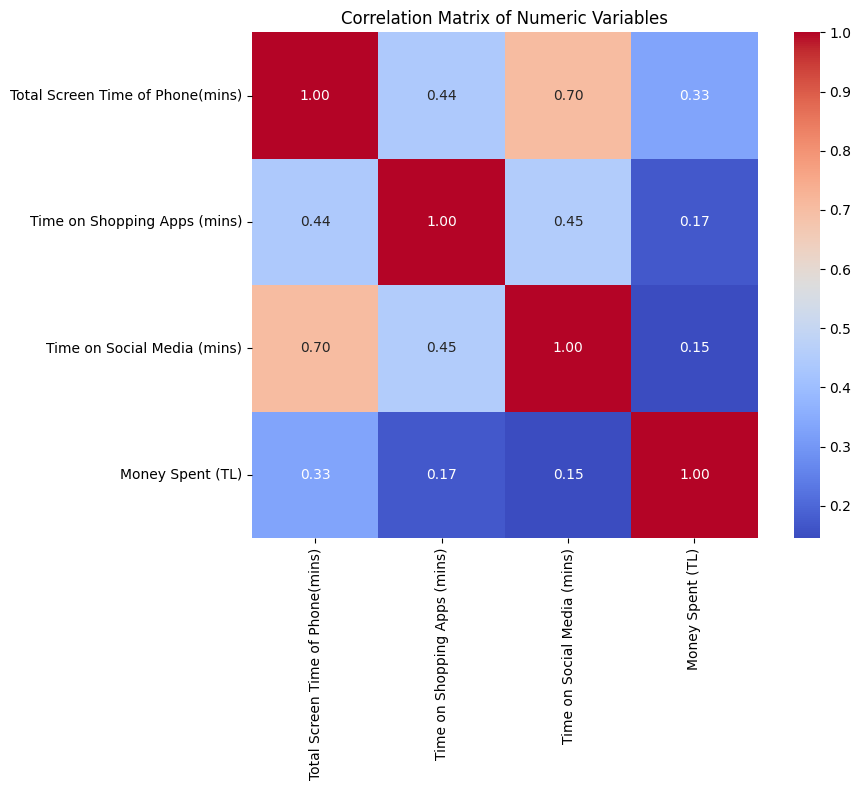

In [18]:
# Clean column names
df.columns = df.columns.str.strip()

# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# **Hypothesis Testing**


---

Part a)

  1.   Pearson correlation coefficient
  2.   P-value

Part b)


  1.   Categorical hypothesis testing





In [19]:

correlation_coefficient, p_value = pearsonr(df['Total Screen Time of Phone(mins)'], df['Money Spent (TL)'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("The p-value is less than 0.05. We reject the null hypothesis.")
else:
    print("The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.")

Pearson Correlation Coefficient: 0.33
P-Value: 0.0007
The p-value is less than 0.05. We reject the null hypothesis.


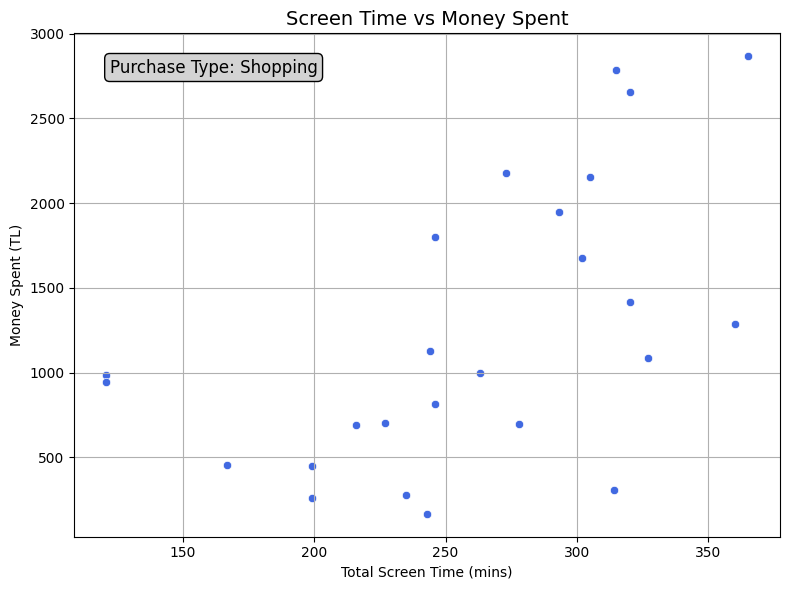

--- Shopping ---
Pearson Correlation Coefficient: 0.56
P-Value: 0.0039



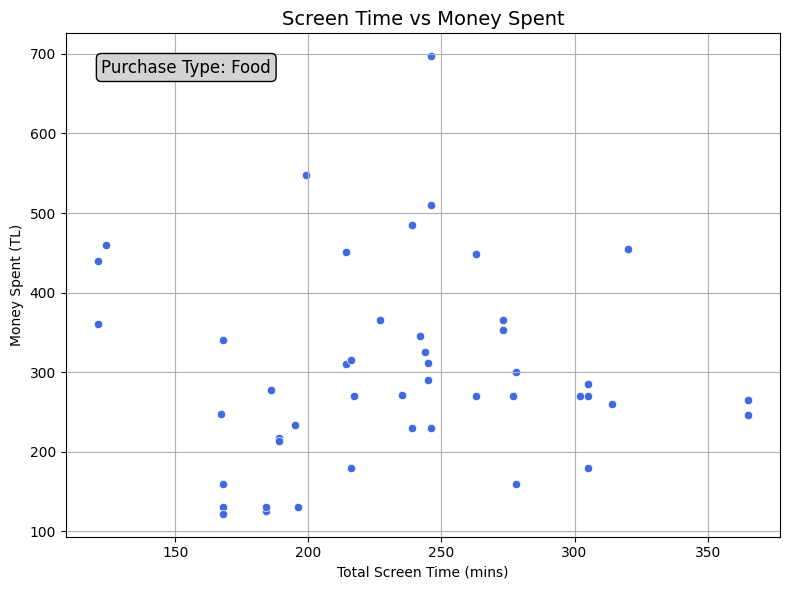

--- Food ---
Pearson Correlation Coefficient: 0.03
P-Value: 0.8256



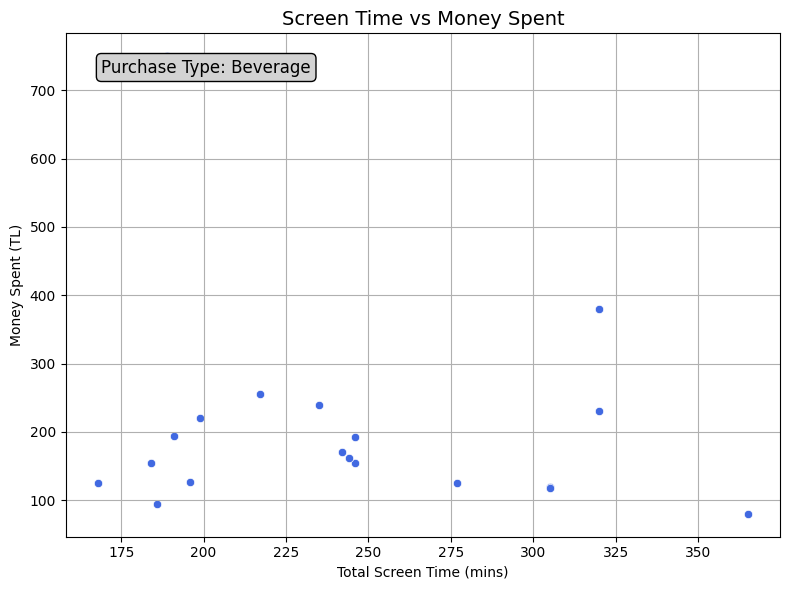

--- Beverage ---
Pearson Correlation Coefficient: -0.17
P-Value: 0.4960



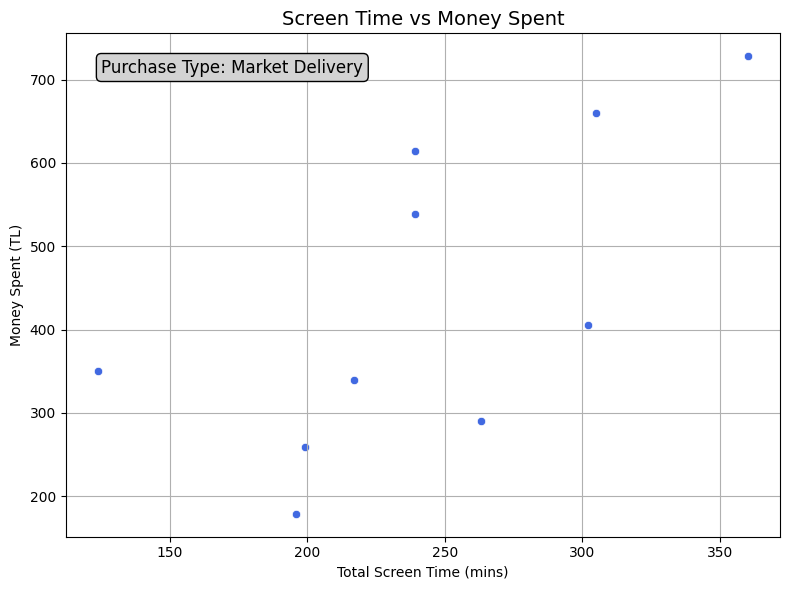

--- Market Delivery ---
Pearson Correlation Coefficient: 0.66
P-Value: 0.0363



In [20]:
##Purchase Type vs Screen Time Correlation
df.columns = df.columns.str.strip()

# Clean Purchase Type column
df['Purchase Type'] = df['Purchase Type'].str.strip()

# Define purchase categories to check
purchase_types = ['Shopping', 'Food', 'Beverage', 'Market Delivery']

# Loop through each purchase type
for p_type in purchase_types:
    filtered_df = df[df['Purchase Type'] == p_type]

    if not filtered_df.empty:
        # Scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            data=filtered_df,
            x='Total Screen Time of Phone(mins)',
            y='Money Spent (TL)',
            color='royalblue'
        )

        # Main title
        plt.title('Screen Time vs Money Spent', fontsize=14)
        # Add Purchase Type on the top left inside the plot
        plt.text(
            0.05, 0.95,
            f'Purchase Type: {p_type}',
            horizontalalignment='left',
            verticalalignment='top',
            transform=plt.gca().transAxes,
            fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey")
        )

        plt.xlabel('Total Screen Time (mins)')
        plt.ylabel('Money Spent (TL)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Pearson correlation
        x = filtered_df['Total Screen Time of Phone(mins)']
        y = filtered_df['Money Spent (TL)']
        correlation, p_value = pearsonr(x, y)

        print(f"--- {p_type} ---")
        print(f"Pearson Correlation Coefficient: {correlation:.2f}")
        print(f"P-Value: {p_value:.4f}\n")
    else:
        print(f"No data available for {p_type}.\n")


# **Machine Learning**


---







In [72]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/daily_spendings - lastversion.xlsx" #to directly use the data without adjustments df is redefined again
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Comparison Between Random Forest and Linear Regression Models*


* While Linear Regression offers interpretability, Random Forest excels in predictive accuracy for this task, making it the preferred model for understanding and forecasting user spending behavior based on screen activity.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Absolute Error (MAE): 104.66
Root Mean Squared Error (RMSE): 191.44
R² Score: 0.87


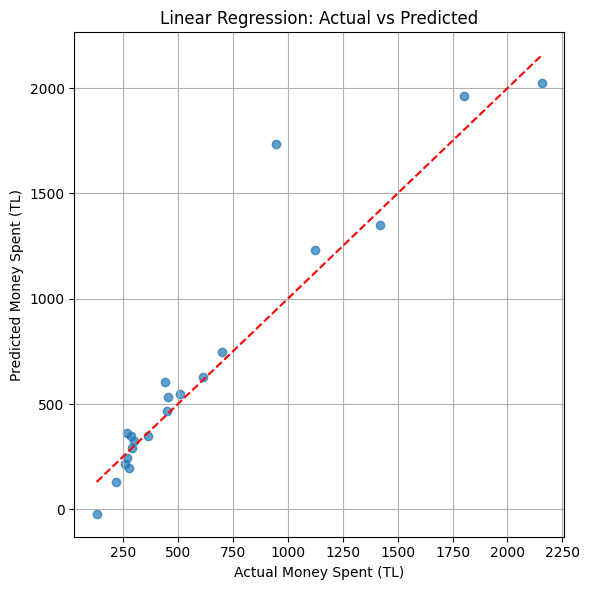

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/daily_spendings - lastversion.xlsx"
df = pd.read_excel(file_path)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Money Spent (TL)'] = pd.to_numeric(df['Money Spent (TL)'], errors='coerce')
df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({'yes': 1, 'no': 0})

df = df.dropna(subset=[
    'Total Screen Time of Phone(mins)',
    'Time on Shopping Apps (mins)',
    'Time on Social Media (mins)',
    'Money Spent (TL)',
    'Ad Exposure Before Purchase (Yes/No)',
    'Time of Purchase'
])

df['Spending Rate'] = df.apply(
    lambda row: row['Money Spent (TL)'] / row['Total Screen Time of Phone(mins)'] if row['Total Screen Time of Phone(mins)'] > 0 else 0,
    axis=1
)
df['Spending Rate'] = df['Spending Rate'].replace([np.inf, -np.inf], 0).fillna(0)

df['Is_Weekend'] = df['Date'].dt.weekday >= 5
df['Is_Weekend'] = df['Is_Weekend'].astype(int)

regression_features = [
    'Total Screen Time of Phone(mins)',
    'Time on Shopping Apps (mins)',
    'Time on Social Media (mins)',
    'Ad Exposure Before Purchase (Yes/No)',
    'Spending Rate',
    'Is_Weekend'
]

present_regression_features = [feat for feat in regression_features if feat in df.columns]
X_reg = df[present_regression_features]

y_reg = df['Money Spent (TL)']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train_reg, y_train_reg)
y_pred_reg = linreg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linestyle='--')
plt.xlabel("Actual Money Spent (TL)")
plt.ylabel("Predicted Money Spent (TL)")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest MAE: 75.57
Random Forest RMSE: 129.55
Random Forest R² Score: 0.94


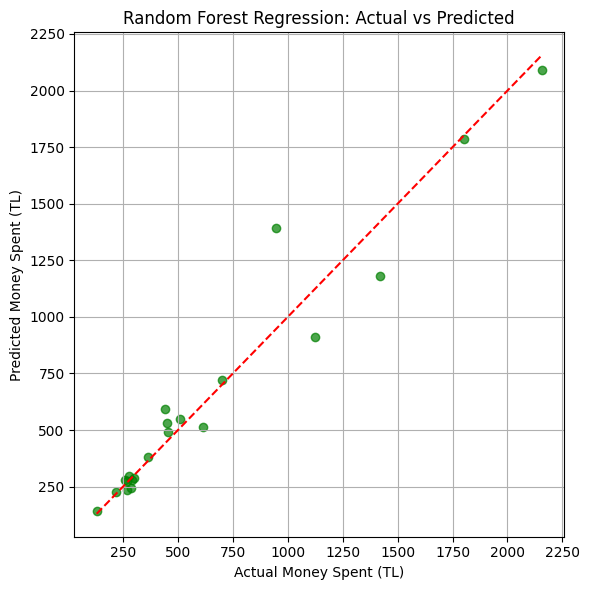

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

# Evaluation
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf_reg)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg))
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.7, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linestyle='--')
plt.xlabel("Actual Money Spent (TL)")
plt.ylabel("Predicted Money Spent (TL)")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df['Log_Money_Spent'] = np.log1p(df['Money Spent (TL)'])

# 1. Select input features
features = [
    'Total Screen Time of Phone(mins)',
    'Time on Shopping Apps (mins)',
    'Time on Social Media (mins)',
    'Ad Exposure Before Purchase (Yes/No)',
    'Spending Rate',
    'Is_Weekend',
    'Log_Money_Spent'
] + [col for col in df.columns if col.startswith('Time of Purchase_')]

X = df[features]
y = df['Purchase Type Encoded']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = lr.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 5. Confusion matrix
labels = label_enc.classes_
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression – Confusion Matrix")
plt.tight_layout()
plt.show()


KeyError: 'Purchase Type Encoded'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


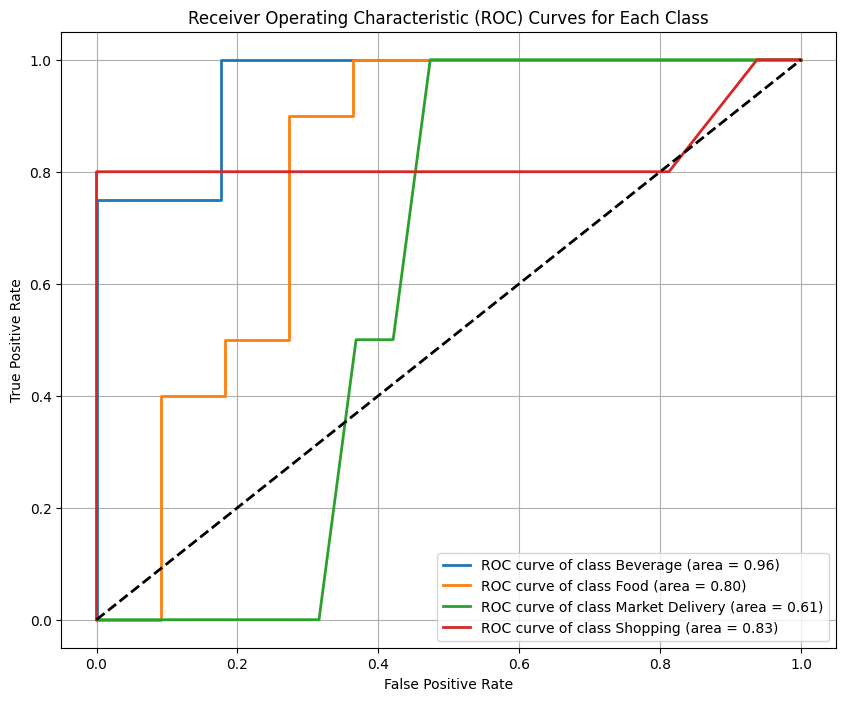

In [84]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create log-transformed spending
df['Log_Money_Spent'] = np.log1p(df['Money Spent (TL)'])

# Encode Purchase Type
label_enc = LabelEncoder()
df['Purchase Type Encoded'] = label_enc.fit_transform(df['Purchase Type'])

drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/daily_spendings - lastversion.xlsx"
df = pd.read_excel(file_path)


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Money Spent (TL)'] = pd.to_numeric(df['Money Spent (TL)'], errors='coerce')
df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({'yes': 1, 'no': 0})


critical_cols = [
    'Total Screen Time of Phone(mins)', 'Time on Shopping Apps (mins)',
    'Time on Social Media (mins)', 'Ad Exposure Before Purchase (Yes/No)',
    'Money Spent (TL)', 'Purchase Type', 'Time of Purchase'
]
df = df.dropna(subset=critical_cols)

df['Spending Rate'] = df['Money Spent (TL)'] / df['Total Screen Time of Phone(mins)']
df['Spending Rate'] = df['Spending Rate'].replace([np.inf, -np.inf], 0).fillna(0)

df['Is_Weekend'] = df['Date'].dt.weekday >= 5
df['Is_Weekend'] = df['Is_Weekend'].astype(int)
df['Log_Money_Spent'] = np.log1p(df['Money Spent (TL)'])

if 'Time of Purchase' in df.columns:
    df = pd.get_dummies(df, columns=['Time of Purchase'], drop_first=True)



if 'Purchase Type' in df.columns:
    label_enc = LabelEncoder()
    df['Purchase Type Encoded'] = label_enc.fit_transform(df['Purchase Type'])
    labels = label_enc.classes_



features = [
    'Total Screen Time of Phone(mins)', 'Time on Shopping Apps (mins)',
    'Time on Social Media (mins)', 'Ad Exposure Before Purchase (Yes/No)',
    'Spending Rate', 'Is_Weekend', 'Log_Money_Spent'
] + [col for col in df.columns if col.startswith('Time of Purchase_')]

present_features = [feat for feat in features if feat in df.columns]
X = df[present_features]

y = df['Purchase Type Encoded']

if X.empty or y.empty:
    raise ValueError("X or y is empty after selecting features. Check feature names and dropna step.")


n_samples = X.shape[0]
if n_samples == 0:
     raise ValueError("n_samples is 0 before train_test_split. Data is empty.")

unique_classes, counts = np.unique(y, return_counts=True)
if any(counts < 2):
    print("Warning: Some classes have less than 2 samples, stratification might not be possible.")


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

y_score = clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    if np.sum(y_test_bin[:, i]) > 0:
        try:
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=2,
                     label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:.2f})')
        except ValueError as e:
            print(f"Could not compute ROC for class {labels[i]}: {e}")
    else:
        print(f"Class {labels[i]} not present in the test set.")


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

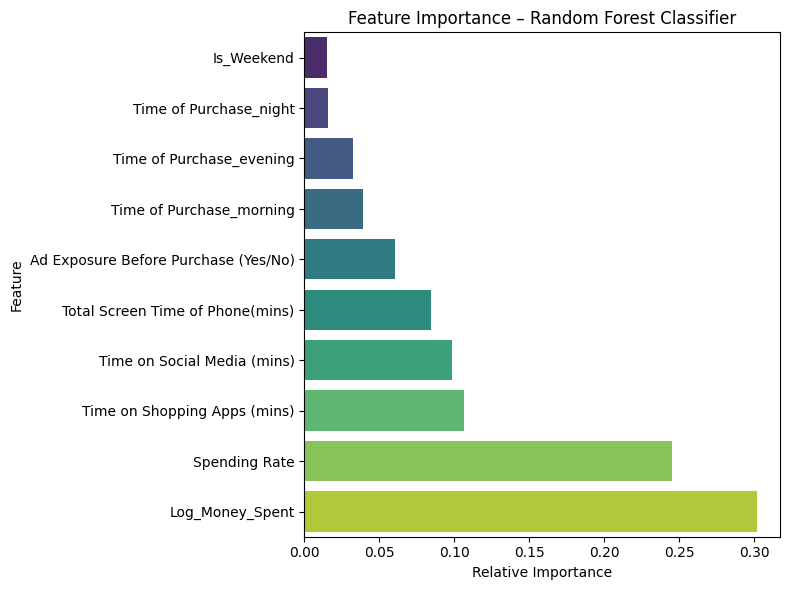

In [82]:
# Feature importance visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title("Feature Importance – Random Forest Classifier")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


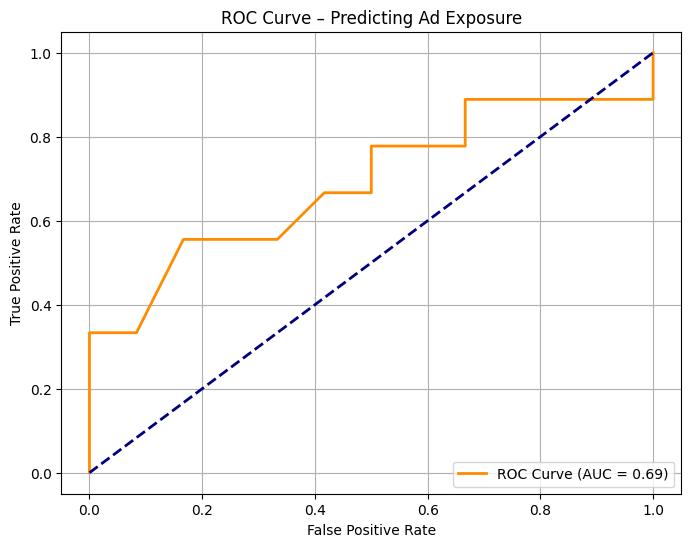

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/daily_spendings - lastversion.xlsx"
df = pd.read_excel(file_path)


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Money Spent (TL)'] = pd.to_numeric(df['Money Spent (TL)'], errors='coerce')

df['Ad Exposure Before Purchase (Yes/No)'] = df['Ad Exposure Before Purchase (Yes/No)'].map({'yes': 1, 'no': 0})


df = df.dropna(subset=[
    'Total Screen Time of Phone(mins)',
    'Time on Shopping Apps (mins)',
    'Time on Social Media (mins)',
    'Money Spent (TL)',
    'Purchase Type',
    'Ad Exposure Before Purchase (Yes/No)',
    'Time of Purchase'
])

# Feature engineering
from sklearn.preprocessing import LabelEncoder
df['Spending Rate'] = df['Money Spent (TL)'] / df['Total Screen Time of Phone(mins)']
df['Is_Weekend'] = df['Date'].dt.weekday >= 5
df['Log_Money_Spent'] = np.log1p(df['Money Spent (TL)'])


label_enc = LabelEncoder()
if 'Purchase Type' in df.columns:
    df['Purchase Type Encoded'] = label_enc.fit_transform(df['Purchase Type'])
else:
     print("Warning: 'Purchase Type' column not found for encoding.")


if 'Time of Purchase' in df.columns:
    df = pd.get_dummies(df, columns=['Time of Purchase'], drop_first=True)
else:
    print("Warning: 'Time of Purchase' column not found for one-hot encoding.")


ad_exposure_features = [
    'Total Screen Time of Phone(mins)',
    'Time on Shopping Apps (mins)',
    'Time on Social Media (mins)',
    'Money Spent (TL)', # Money spent could potentially influence ad exposure context
    'Spending Rate',
    'Is_Weekend',
    'Log_Money_Spent'
] + [col for col in df.columns if col.startswith('Time of Purchase_')]


present_ad_exposure_features = [feat for feat in ad_exposure_features if feat in df.columns]
X_ad = df[present_ad_exposure_features]





y_ad = df['Ad Exposure Before Purchase (Yes/No)']




# Split the data for Ad Exposure prediction
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(
    X_ad,
    y_ad,
    test_size=0.2,
    random_state=42,
    stratify=y_ad # Stratify to ensure proportional representation of Yes/No
)

# Using a new model instance specifically for this task
ad_exposure_model = RandomForestClassifier(random_state=42)
ad_exposure_model.fit(X_train_ad, y_train_ad)



y_probs_ad = ad_exposure_model.predict_proba(X_test_ad)[:, 1] # Probability for class 1 (Ad = Yes)

fpr, tpr, thresholds = roc_curve(y_test_ad, y_probs_ad)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Predicting Ad Exposure')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()